This notebook replicates the article "Volatility is Rough" from Jim Gatheral, Thibault Jaisson, Mathieu Rosenbaum

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("./Documents/oxfordmanrealizedvolatilityindices.csv")

In [3]:
df

,Unnamed: 0,S&P 500 (Live),S&P 500 (Live).1,S&P 500 (Live).2,S&P 500 (Live).3,S&P 500 (Live).4,S&P 500 (Live).5,S&P 500 (Live).6,S&P 500 (Live).7,S&P 500 (Live).8,...,FTSE MIB (Live).9,FTSE MIB (Live).10,FTSE MIB (Live).11,FTSE MIB (Live).12,FTSE MIB (Live).13,FTSE MIB (Live).14,FTSE MIB (Live).15,FTSE MIB (Live).16,FTSE MIB (Live).17,FTSE MIB (Live).18
0,NaN,Realized Variance (5-minute),Realized Kernel,Return,Realized Variance (5-minute using 1-minute sub...,Realized Variance (10-minute),Realized Variance (10-minute using 1-minute su...,Bipower Variation (5-minute),Bipower Variation (5-minute using 1-minute sub...,Median Truncated Realized Variance,...,Realized Semivariance (5-minute),Realized Semivariance (5-minute using 1-minute...,Number of Transactions,Time span betwen first and last observation (s...,Close-to-Open Return,Opening Time (Local in Seconds),High-Low Range,High-Open Range,Opening Price,Closing Price
1,DateID,SPX2.rv,SPX2.rk,SPX2.r,SPX2.rv5ss,SPX2.rv10,SPX2.rv10ss,SPX2.bv5,SPX2.bv5ss,SPX2.medrv,...,FTSEMIB.rs,FTSEMIB.rs5ss,FTSEMIB.nobs,FTSEMIB.timespan,FTSEMIB.rcto,FTSEMIB.open,FTSEMIB.highlow,FTSEMIB.highopen,FTSEMIB.openprice,FTSEMIB.closeprice
2,20000103,0.000157239596459558,0.000160726642338866,-0.0101036180817431,0.00014410167533591,0.000175343616941057,0.00016970470393023,0.000156756760929018,0.000142221651656264,8.38940438305979E-05,...,0.000323140832231174,0.000313602871999625,496,29752.752,NaN,34152.212,0.0617386000840217,0.00252528259234275,43900,41477
3,20000104,0.000298147448739244,0.000264396469319473,-0.0392921825644033,0.000219256477223869,0.000399598741726631,0.000246740561211512,0.000205714859947726,0.000205847451568751,9.17368030288873E-05,...,0.000143981264311568,0.000172766636943784,471,28319.096,NaN,35524.926,0.0206669189666453,0.00104639429407349,41072,40468
4,20000105,0.000307225852905134,0.000304650302935347,0.00174919456727718,0.000297788864162233,0.000257950686631379,0.000306705670365806,0.000292364730294294,0.000278867843969926,0.000110619691307015,...,0.000143674016234635,0.00015252940672855,497,29751.621,NaN,34154.433,-0.0295836961313398,0.0295836961313398,39000,39449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,20171129,1.60061e-05,1.6957e-05,-0.000692829,1.67632e-05,1.58304e-05,1.63305e-05,1.23448e-05,1.33693e-05,1.90573e-05,...,2.98824e-05,2.45894e-05,19553,27358.8,NaN,32401.2,0.0104383,0.00522229,22391.4,22325.9
4681,20171130,2.76364e-05,2.04889e-05,0.00488567,2.34674e-05,3.4687e-05,2.50296e-05,2.44202e-05,2.3891e-05,1.7733e-05,...,2.08775e-05,2.37103e-05,23672,27357.6,NaN,32402.9,0.00846672,0.004035,22467.6,22368.3
4682,20171201,8.82692e-05,0.000130119,-0.00125594,0.000116815,0.000120477,0.000124135,9.29468e-05,0.000125886,0.000138206,...,4.68778e-05,5.39375e-05,25521,27359.2,NaN,32401,-0.0138619,0.0089832,22168.4,22106.1
4683,20171204,2.28674e-05,2.30594e-05,-0.00685396,2.1121e-05,2.21217e-05,2.0303e-05,2.37703e-05,2.16296e-05,1.99288e-05,...,1.52086e-05,1.50481e-05,21585,27359.2,NaN,32400.9,0.00657555,0.00316626,22350.6,22362.1


In [4]:
df.shape

(4685, 400)

In [5]:
title=df.iloc[1]
title=title.tolist()

for indice in range(20):
    var_name="n_index_"+str(indice+1)
    globals()[var_name]=[title[0]]+title[indice*19+1:(indice+1)*19+1]

In [6]:
data=df.drop([0,1],axis=0)
data.columns=title

def drop_columns(data, indice):
    first_col = data.columns[0]
    keep_cols = [first_col] + list(data.iloc[:, indice*19+1:(indice+1)*19+1].columns)
    return data[keep_cols]

for indice in range(20):
    var_name="index_"+str(indice+1)
    globals()[var_name]=drop_columns(data, indice)

In [7]:
index_1

,DateID,SPX2.rv,SPX2.rk,SPX2.r,SPX2.rv5ss,SPX2.rv10,SPX2.rv10ss,SPX2.bv5,SPX2.bv5ss,SPX2.medrv,SPX2.rs,SPX2.rs5ss,SPX2.nobs,SPX2.timespan,SPX2.rcto,SPX2.open,SPX2.highlow,SPX2.highopen,SPX2.openprice,SPX2.closeprice
2,20000103,0.000157239596459558,0.000160726642338866,-0.0101036180817431,0.00014410167533591,0.000175343616941057,0.00016970470393023,0.000156756760929018,0.000142221651656264,8.38940438305979E-05,9.94960444650306E-05,0.00010005081222016,1554,23393.886,NaN,34191.158,0.0271862468537662,0.0059377560153866,1469.25,1454.48
3,20000104,0.000298147448739244,0.000264396469319473,-0.0392921825644033,0.000219256477223869,0.000399598741726631,0.000246740561211512,0.000205714859947726,0.000205847451568751,9.17368030288873E-05,0.000254282775561593,0.000165044189695656,1564,23389.873,NaN,34195.042,0.0405222565954526,0,1455.22,1399.15
4,20000105,0.000307225852905134,0.000304650302935347,0.00174919456727718,0.000297788864162233,0.000257950686631379,0.000306705670365806,0.000292364730294294,0.000278867843969926,0.000110619691307015,0.000138132813215247,0.000127924814102194,1552,23392.283,NaN,34196.701,-0.025505243236438,0.00984830318405283,1399.42,1401.87
5,20000106,0.000136237904617473,0.000148582063339039,0.00106211984850368,0.000136479949750481,0.000108310420121052,0.000132804570273788,0.000127030281953223,0.000126582275994925,8.5516593541569E-05,6.20495970776298E-05,6.20614059989149E-05,1561,23386.417,NaN,34191.425,-0.0141803854082383,0.00695807015492278,1402.11,1403.6
6,20000107,9.27209869197684E-05,0.000123266970191763,0.0260220738074048,0.000111819433642809,0.000121495135491433,0.000113809042388789,8.30250894519708E-05,9.49011546626863E-05,4.89545364708494E-05,2.40959986592881E-05,2.85392963857732E-05,1540,23398.751,NaN,34186.145,-0.0280661641771234,0.026126202510576,1403.45,1440.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,20171129,1.60061e-05,1.6957e-05,-0.000692829,1.67632e-05,1.58304e-05,1.63305e-05,1.23448e-05,1.33693e-05,1.90573e-05,8.92337e-06,9.45666e-06,23401,23400,NaN,30601.1,0.00554499,0.00268683,2627.82,2626
4681,20171130,2.76364e-05,2.04889e-05,0.00488567,2.34674e-05,3.4687e-05,2.50296e-05,2.44202e-05,2.3891e-05,1.7733e-05,1.02367e-05,8.91325e-06,23400,23399,NaN,30601.1,-0.00899911,0.00899911,2633.93,2646.83
4682,20171201,8.82692e-05,0.000130119,-0.00125594,0.000116815,0.000120477,0.000124135,9.29468e-05,0.000125886,0.000138206,6.12487e-05,7.23142e-05,23391,23399,NaN,30601.1,0.0171613,0.0020847,2645.1,2641.78
4683,20171204,2.28674e-05,2.30594e-05,-0.00685396,2.1121e-05,2.21217e-05,2.0303e-05,2.37703e-05,2.16296e-05,1.99288e-05,1.39459e-05,1.37726e-05,23401,23400,NaN,30601.1,0.00986013,0.00300618,2657.19,2639.04


### Replicate graphs of the article for S&P 500 index 

In [8]:
row_max=index_1.loc[index_1['DateID']==20140331].index[0]
sp_rep=index_1.drop(index=range(row_max+1, len(index_1)+1))
sp_rep['SPX2.rk'] = pd.to_numeric(sp_rep['SPX2.rk'], errors='coerce')
sp_rep=sp_rep.dropna(subset=['SPX2.rk'])
sp_rep

,DateID,SPX2.rv,SPX2.rk,SPX2.r,SPX2.rv5ss,SPX2.rv10,SPX2.rv10ss,SPX2.bv5,SPX2.bv5ss,SPX2.medrv,SPX2.rs,SPX2.rs5ss,SPX2.nobs,SPX2.timespan,SPX2.rcto,SPX2.open,SPX2.highlow,SPX2.highopen,SPX2.openprice,SPX2.closeprice
2,20000103,0.000157239596459558,0.000161,-0.0101036180817431,0.00014410167533591,0.000175343616941057,0.00016970470393023,0.000156756760929018,0.000142221651656264,8.38940438305979E-05,9.94960444650306E-05,0.00010005081222016,1554,23393.886,NaN,34191.158,0.0271862468537662,0.0059377560153866,1469.25,1454.48
3,20000104,0.000298147448739244,0.000264,-0.0392921825644033,0.000219256477223869,0.000399598741726631,0.000246740561211512,0.000205714859947726,0.000205847451568751,9.17368030288873E-05,0.000254282775561593,0.000165044189695656,1564,23389.873,NaN,34195.042,0.0405222565954526,0,1455.22,1399.15
4,20000105,0.000307225852905134,0.000305,0.00174919456727718,0.000297788864162233,0.000257950686631379,0.000306705670365806,0.000292364730294294,0.000278867843969926,0.000110619691307015,0.000138132813215247,0.000127924814102194,1552,23392.283,NaN,34196.701,-0.025505243236438,0.00984830318405283,1399.42,1401.87
5,20000106,0.000136237904617473,0.000149,0.00106211984850368,0.000136479949750481,0.000108310420121052,0.000132804570273788,0.000127030281953223,0.000126582275994925,8.5516593541569E-05,6.20495970776298E-05,6.20614059989149E-05,1561,23386.417,NaN,34191.425,-0.0141803854082383,0.00695807015492278,1402.11,1403.6
6,20000107,9.27209869197684E-05,0.000123,0.0260220738074048,0.000111819433642809,0.000121495135491433,0.000113809042388789,8.30250894519708E-05,9.49011546626863E-05,4.89545364708494E-05,2.40959986592881E-05,2.85392963857732E-05,1540,23398.751,NaN,34186.145,-0.0280661641771234,0.026126202510576,1403.45,1440.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,20140325,5.83125e-05,0.000054,0.00336088,3.81736e-05,4.70215e-05,3.35493e-05,3.10771e-05,3.34911e-05,2.5993e-05,1.36102e-05,1.605e-05,4680,23396.1,NaN,34201.4,0.00853585,0.00664105,1859.48,1865.74
3719,20140326,4.15779e-05,0.000045,-0.00770465,3.33386e-05,4.99464e-05,3.49313e-05,2.81125e-05,2.9299e-05,3.45473e-05,2.14272e-05,2.18856e-05,4667,23395.2,NaN,34202.1,0.0124228,0.00471814,1867.09,1852.76
3720,20140327,6.37995e-05,0.000056,-0.00166435,5.36916e-05,6.81139e-05,5.01508e-05,7.01828e-05,4.8672e-05,5.05355e-05,3.43207e-05,2.9389e-05,4681,23399.6,NaN,34202.3,-0.00726949,0.00185562,1852.11,1849.03
3721,20140328,3.80403e-05,0.000032,0.0039488,2.84078e-05,5.44423e-05,3.08314e-05,3.07779e-05,2.38378e-05,2.1824e-05,1.00556e-05,9.59391e-06,4680,23395,NaN,34201.8,-0.00891119,0.00891119,1850.07,1857.39


In [9]:
sp_rep['SPX2.rk'].apply(np.sqrt).describe()

count    3553.000000
mean        0.009374
std         0.006153
min         0.001533
25%         0.005549
50%         0.007871
75%         0.011001
max         0.096503
Name: SPX2.rk, dtype: float64

<AxesSubplot:>

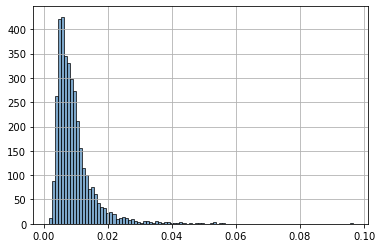

In [10]:
sp_rep['SPX2.rk'].apply(np.sqrt).hist(bins=100, color='steelblue', edgecolor='black', alpha=0.7)

In [11]:
logvol=sp_rep['SPX2.rk'].apply(lambda x: np.log(np.sqrt(x)))
logvol=logvol.reset_index(drop=True)
type(logvol)

pandas.core.series.Series

In [12]:
def hurst_est(q, x, data): 
    return [np.mean(np.abs(data - data.shift(lag))**q) for lag in x]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.266e+04
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          1.39e-104
Time:                        10:26:25   Log-Likelihood:                 366.19
No. Observations:                  99   AIC:                            -728.4
Df Residuals:                      97   BIC:                            -723.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8186      0.002   -331.901      0.0

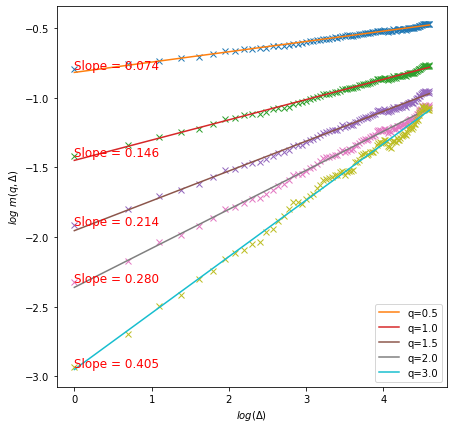

In [13]:
plt.figure(figsize=(7, 7))
plt.xlabel('$log(\Delta)$')
plt.ylabel('$log\  m(q,\Delta)$')
plt.ylim=(-3, -.5)

zeta_q = []
Q = np.array([.5, 1, 1.5, 2, 3])
x = np.arange(1, 100)
for q in Q:
    y_d=np.log(hurst_est(q, x, logvol))
    x_d=np.log(x)
    x_with_constant = sm.add_constant(x_d)
    model = sm.OLS(y_d, x_with_constant)
    results = model.fit()
    coefficients = results.params
    p_values = results.pvalues
    print(results.summary())
    plt.plot(np.log(x), np.log(hurst_est(q, x,logvol)), 'x') 
    model = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol)), 1)
    plt.plot(np.log(x), np.log(x) * model[0] + model[1], label="q={}".format(q))
    x_text = np.log(x[0])
    y_text = np.log(hurst_est(q, x, logvol))[0]

    # Afficher la valeur de la pente sur le graphique
    plt.text(x_text, y_text, 'Slope = {:.3f}'.format(model[0]), fontsize=12, color='red')
    plt.legend(loc='lower right')
    
    zeta_q.append(model[0])
    
print(zeta_q)

In [14]:
import statsmodels.api as sm
y_d=np.log(hurst_est(0.5, x, logvol))
x_d=np.log(x)
x_with_constant = sm.add_constant(x_d)
model = sm.OLS(y_d, x_with_constant)
results = model.fit()
coefficients = results.params
p_values = results.pvalues
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.266e+04
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          1.39e-104
Time:                        10:26:27   Log-Likelihood:                 366.19
No. Observations:                  99   AIC:                            -728.4
Df Residuals:                      97   BIC:                            -723.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8186      0.002   -331.901      0.0

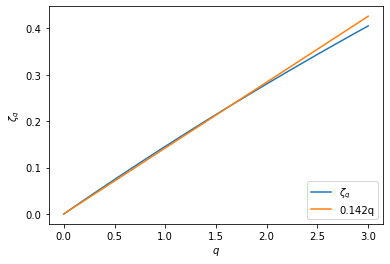

In [15]:
Q=np.linspace(0,3,20)
zeta_q=[]
for q in Q:
    model = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol)), 1)
    zeta_q.append(model[0])
    
plt.ylabel('$\zeta_q$')
plt.xlabel('$q$')
plt.plot(Q,zeta_q,label="$\zeta_q$")
plt.plot(Q,0.142*Q,label="0.142q")
plt.legend(loc='lower right')

### Compare log-volatility smoothness over the different indexes on the same time interval (01/03/2000 up to 03/31/2014)

In [16]:
row_max=index_1.loc[index_1['DateID']==20140331].index[0]

L=pd.DataFrame(index=['zeta_0.5/0.5','zeta_1','zeta_1.5/1.5','zeta_2/2','zeta_3/3'])
Q=np.array([.5, 1, 1.5, 2, 3])
x = np.arange(1, 100)

for indice in range(20):
    
    zeta_q=[]
    index_nb="index_"+str(indice+1)
    var_name="logvol_index_"+str(indice+1)
    globals()[var_name]=(globals()[index_nb]).drop(index=range(row_max+1, len(index_1)))
    (globals()[var_name]).iloc[:,1] = pd.to_numeric((globals()[var_name]).iloc[:,1], errors='coerce')
    globals()[var_name]=(globals()[var_name]).dropna(subset=[(globals()[var_name]).columns[2]])
    globals()[var_name]=globals()[var_name].iloc[:,1].apply(lambda x: np.log(np.sqrt(x)))
    globals()[var_name]=globals()[var_name].reset_index(drop=True)
    for q in Q:
        model = np.polyfit(np.log(x), np.log(hurst_est(q, x, globals()[var_name])), 1)
        zeta_q.append(model[0]/q)
    L["{}".format(var_name)]=zeta_q

print(L.transpose())

                 zeta_0.5/0.5    zeta_1  zeta_1.5/1.5  zeta_2/2  zeta_3/3
logvol_index_1       0.136395  0.133852      0.131192  0.128574  0.123671
logvol_index_2       0.153391  0.149229      0.144530  0.139299  0.127480
logvol_index_3       0.120267  0.118125      0.115833  0.113213  0.106488
logvol_index_4       0.175987  0.168450      0.161046  0.153901  0.140800
logvol_index_5       0.126654  0.122646      0.118705  0.114926  0.108045
logvol_index_6       0.089926  0.087408      0.085018  0.082632  0.077703
logvol_index_7       0.129169  0.126397      0.123338  0.120225  0.114200
logvol_index_8            NaN       NaN           NaN       NaN       NaN
logvol_index_9       0.160729  0.155485      0.150152  0.144848  0.134520
logvol_index_10      0.099477  0.099293      0.099550  0.100115  0.101667
logvol_index_11      0.132432  0.130736      0.128919  0.126721  0.120398
logvol_index_12      0.171698  0.167188      0.162084  0.156646  0.145411
logvol_index_13      0.179965  0.17955

### S&P 500 log-volatility smoothness over different periods

Let's try over the most recent data of the S&P500 that were not treated in the article, that is from 04/01/2014 until 12/05/2017

In [17]:
sp_new=index_1.drop(index=range(2,row_max))
sp_new['SPX2.rk'] = pd.to_numeric(sp_new['SPX2.rk'], errors='coerce')
sp_new=sp_new.dropna(subset=['SPX2.rk'])
sp_new

,DateID,SPX2.rv,SPX2.rk,SPX2.r,SPX2.rv5ss,SPX2.rv10,SPX2.rv10ss,SPX2.bv5,SPX2.bv5ss,SPX2.medrv,SPX2.rs,SPX2.rs5ss,SPX2.nobs,SPX2.timespan,SPX2.rcto,SPX2.open,SPX2.highlow,SPX2.highopen,SPX2.openprice,SPX2.closeprice
3722,20140331,4.98804e-05,0.000038,0.00708024,2.27611e-05,6.08896e-05,1.90133e-05,2.41732e-05,1.56761e-05,1.98402e-05,8.43869e-06,6.88887e-06,4680,23395.9,NaN,34201.5,-0.00857988,0.00857988,1859.16,1872.37
3723,20140401,2.26938e-05,0.000017,0.00617632,1.4141e-05,1.7512e-05,1.26665e-05,1.31022e-05,1.08669e-05,1.15654e-05,5.56503e-06,5.36655e-06,4680,23395.5,NaN,34201.5,-0.00631951,0.00631951,1873.96,1885.57
3724,20140402,1.39093e-05,0.000012,0.00232422,1.22346e-05,1.64002e-05,1.18898e-05,1.27294e-05,1.13155e-05,1.2854e-05,6.80159e-06,5.49289e-06,4680,23395.4,NaN,34201.8,-0.00496697,0.0034711,1886.61,1891
3725,20140403,1.4626e-05,0.000015,-0.00127498,1.40779e-05,1.48719e-05,1.31853e-05,1.26969e-05,1.26176e-05,1.39261e-05,8.00804e-06,8.29271e-06,4680,23395.1,NaN,34201.8,0.00590503,0.00125224,1891.43,1889.02
3726,20140404,6.01121e-05,0.000055,-0.0133462,5.03115e-05,7.13636e-05,5.74762e-05,5.35385e-05,5.03526e-05,4.13271e-05,3.67641e-05,3.30974e-05,4680,23395.7,NaN,34201.6,0.0180936,0.00371219,1890.25,1865.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679,20171128,1.10141e-05,0.000010,0.00815183,1.16577e-05,1.33439e-05,1.47325e-05,1.08477e-05,1.19078e-05,7.72355e-06,3.42041e-06,4.16071e-06,23400,23399,NaN,30601.1,-0.00850357,0.00831168,2605.94,2627.27
4680,20171129,1.60061e-05,0.000017,-0.000692829,1.67632e-05,1.58304e-05,1.63305e-05,1.23448e-05,1.33693e-05,1.90573e-05,8.92337e-06,9.45666e-06,23401,23400,NaN,30601.1,0.00554499,0.00268683,2627.82,2626
4681,20171130,2.76364e-05,0.000020,0.00488567,2.34674e-05,3.4687e-05,2.50296e-05,2.44202e-05,2.3891e-05,1.7733e-05,1.02367e-05,8.91325e-06,23400,23399,NaN,30601.1,-0.00899911,0.00899911,2633.93,2646.83
4682,20171201,8.82692e-05,0.000130,-0.00125594,0.000116815,0.000120477,0.000124135,9.29468e-05,0.000125886,0.000138206,6.12487e-05,7.23142e-05,23391,23399,NaN,30601.1,0.0171613,0.0020847,2645.1,2641.78


In [18]:
sp_new['SPX2.rk'].apply(lambda x : 100*np.sqrt(x)).describe()

count    929.000000
mean       0.527314
std        0.315860
min        0.118618
25%        0.330248
50%        0.453691
75%        0.620155
max        4.462434
Name: SPX2.rk, dtype: float64

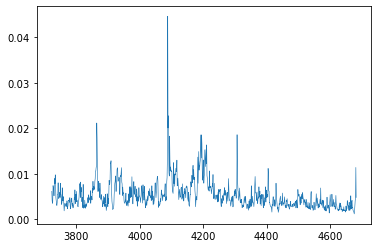

In [19]:
plt.plot(sp_new['SPX2.rk'].apply(lambda x : np.sqrt(x)),linewidth=0.6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     992.2
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           7.94e-23
Time:                        10:26:36   Log-Likelihood:                 88.170
No. Observations:                  29   AIC:                            -172.3
Df Residuals:                      27   BIC:                            -169.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7625      0.007   -109.915      0.0

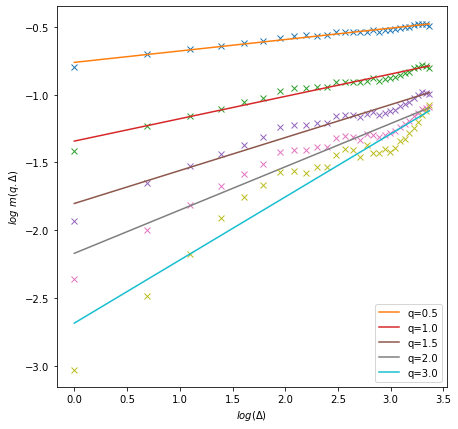

In [20]:
logvol2=sp_new['SPX2.rk'].apply(lambda x: np.log(np.sqrt(x)))
logvol2=logvol2.reset_index(drop=True)

plt.figure(figsize=(7, 7))
plt.xlabel('$log(\Delta)$')
plt.ylabel('$log\  m(q.\Delta)$')
plt.ylim=(-3, -.5)

zeta_q = []
Q = np.array([.5, 1, 1.5, 2, 3])
x = np.arange(1, 30)
for q in Q:
    y_d=np.log(hurst_est(q, x, logvol2))
    x_d=np.log(x)
    x_with_constant = sm.add_constant(x_d)
    model = sm.OLS(y_d, x_with_constant)
    results = model.fit()
    coefficients = results.params
    p_values = results.pvalues
    print(results.summary())
    plt.plot(np.log(x), np.log(hurst_est(q, x,logvol2)), 'x') 
    model = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol2)), 1)
    plt.plot(np.log(x), np.log(x) * model[0] + model[1], label="q={}".format(q))
    plt.legend(loc='lower right')
    zeta_q.append(model[0])
    
print(zeta_q)

This is only linear for low values of q. Let's see how smoothness compares with the previous test.

Text(0.5, 0, '$q$')

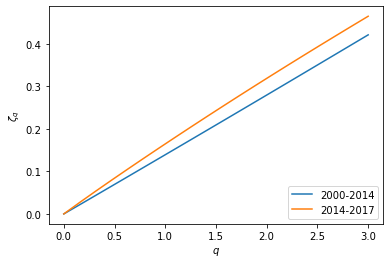

In [30]:
Q=np.linspace(0,3,20)
zeta1_q=[]
zeta2_q=[]
x = np.arange(1, 30)
for q in Q:
    model1 = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol)), 1)
    zeta1_q.append(model1[0])
    model2 = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol2)), 1)
    zeta2_q.append(model2[0])
    
plt.plot(Q,zeta1_q, label="2000-2014")
plt.plot(Q,zeta2_q, label="2014-2017")
plt.legend(loc='lower right')
plt.ylabel('$\zeta_q$')
plt.xlabel('$q$')

Obviously, smoothness is significantly lower for the shorter period. Let's try finally over the GFC i.e. from 2007 until 2010 to  see the effects of the crisis.

In [22]:
index_1['DateID'] = pd.to_datetime(index_1['DateID'], format='%Y%m%d')

r_start=index_1.loc[index_1['DateID'] == pd.to_datetime('20070629', format='%Y%m%d')].index[0]
r_end=index_1.loc[index_1['DateID'] == pd.to_datetime('20101231', format='%Y%m%d')].index[0]

sp_gfc=index_1.drop(index=range(2,r_start))
sp_gfc=sp_gfc.drop(index=range(r_end+1,len(index_1)+2))
sp_gfc['SPX2.rk'] = pd.to_numeric(sp_gfc['SPX2.rk'], errors='coerce')
sp_gfc=sp_gfc.dropna(subset=['SPX2.rk'])
sp_gfc['SPX2.rk'].apply(lambda x : 100*np.sqrt(x)).describe()

count    878.000000
mean       1.263124
std        0.879659
min        0.219911
25%        0.745233
50%        1.011397
75%        1.462641
max        9.650322
Name: SPX2.rk, dtype: float64

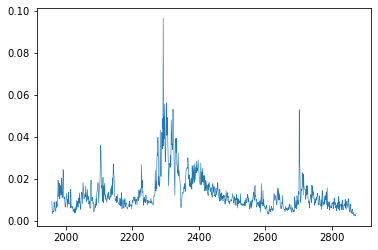

In [23]:
plt.plot(sp_gfc['SPX2.rk'].apply(lambda x : np.sqrt(x)),linewidth=0.6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2980.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.57e-29
Time:                        10:29:12   Log-Likelihood:                 99.714
No. Observations:                  29   AIC:                            -195.4
Df Residuals:                      27   BIC:                            -192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8344      0.005   -179.097      0.0

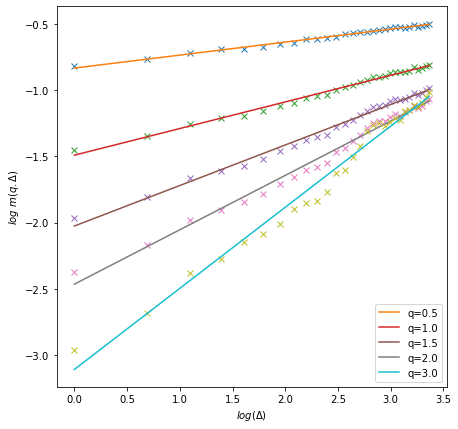

In [29]:
logvol3=sp_gfc['SPX2.rk'].apply(lambda x: np.log(np.sqrt(x)))
logvol3=logvol3.reset_index(drop=True)

plt.figure(figsize=(7, 7))
plt.xlabel('$log(\Delta)$')
plt.ylabel('$log\  m(q.\Delta)$')
plt.ylim=(-3, -.5)

zeta_q = []
Q = np.array([.5, 1, 1.5, 2, 3])
x = np.arange(1, 30)
for q in Q:
    y_d=np.log(hurst_est(q, x, logvol3))
    x_d=np.log(x)
    x_with_constant = sm.add_constant(x_d)
    model = sm.OLS(y_d, x_with_constant)
    results = model.fit()
    coefficients = results.params
    p_values = results.pvalues
    print(results.summary())
    plt.plot(np.log(x), np.log(hurst_est(q, x,logvol3)), 'x') 
    model = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol3)), 1)
    plt.plot(np.log(x), np.log(x) * model[0] + model[1], label="q={}".format(q))
    plt.legend(loc='lower right')
    zeta_q.append(model[0])
    
print(zeta_q)

Here, it seems that the linear relationship is less robust for higher values of q. Thus, it is less consistent to consider such relationship for the log-volatility. Assume the relationship holds, let's see how the smoothness compares with the whole sample (01/03/2000 - 03/31/2014)

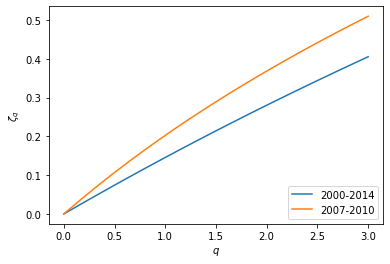

In [32]:
Q=np.linspace(0,3,20)
zeta1_q=[]
zeta2_q=[]
x = np.arange(1, 100)
for q in Q:
    model1 = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol)), 1)
    zeta1_q.append(model1[0])
    model2 = np.polyfit(np.log(x), np.log(hurst_est(q, x, logvol3)), 1)
    zeta2_q.append(model2[0])

plt.ylabel('$\zeta_q$')
plt.xlabel('$q$')
plt.plot(Q,zeta1_q, label="2000-2014")
plt.plot(Q,zeta2_q, label="2007-2010")
plt.legend(loc='lower right')

### Distribution of the increments of the log-volatility (S&P500, 2000-2014)

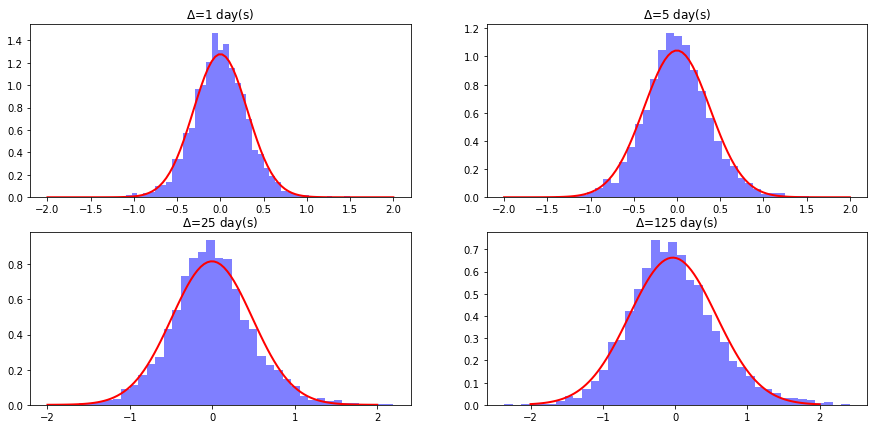

In [26]:
from scipy.stats import norm

logvol=sp_rep['SPX2.rk'].apply(lambda x: np.log(np.sqrt(x)))
logvol=logvol.reset_index(drop=True)
lags=[1,5,25,125]
plt.figure(figsize=(15, 7))
for i in range(4):
    data=logvol-logvol.shift(lags[i])
    mu, std = norm.fit(data.dropna())
    plt.subplot(2,2,i+1)
    plt.title("$\Delta$={} day(s)".format(lags[i]))
    plt.hist(data,color='blue',density=True, bins=40,histtype='bar',alpha=0.5)
    x = np.linspace(-2, 2, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color='r', linewidth=2)

### Autocovariance of the log-volatility as a function of $\Delta^{2H}$

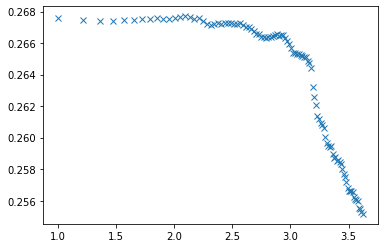

In [27]:
H=0.14
lags = np.arange(1, 100)
autocovariance = np.array([np.sum((logvol[:-lag] - np.mean(logvol[:-lag])) * (logvol[lag:] -  np.mean(logvol[lag:]))) / (len(logvol) - lag) for lag in lags])
plt.plot(pd.DataFrame(lags).apply(lambda x: x**(2*H)).values.tolist(),autocovariance,"x")

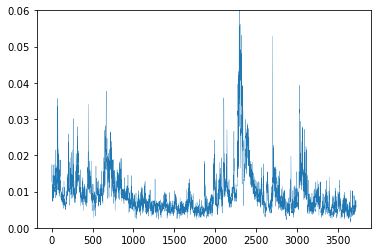

In [28]:
plt.axis(ymax=0.06)
plt.plot(sp_rep['SPX2.rk'].apply(np.sqrt),linewidth=0.3)